<a href="https://colab.research.google.com/github/Blackman9t/Explainable_Fair_Automated_AI/blob/master/detecting_covid19_severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IBM Explainability Hackathon

<font color='yellow'>**Project Title:**</font> Detecting COVID19 Underlying Conditions: Diabetes Case Study<br>
<font color='yellow'>**Authors:**</font> Lawrence Krukrubo<br>
<font color='yellow'>**Date:**</font> 30th April 2020<br>

### Background:

The Novel-Corona-Virus-Infectious-Disease-2019 (COVID19) which originated in Wuhan, China in Dec 2019, has spread to over 185 countries around the world and infected over 2.6 million people, with over 185,000 deaths.
<br>See this [link](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) from the _COVID19 dashboard, by the Center for Systems, Science and Engineering at Johns Hopkins University._

### **Common symptoms of COVID19**

Patients of all ages are being infected by COVID19, whose most common symptoms include:
>>Coughing<br>
Fatigue<br>
Muscle Pain<br>
Chest Pain<br>
Difficulty Breathing<br>
Pneumonia<br>
Loss of Smell<br>
Loss of Taste

Patients range in age from toddlers of few months of age to the elderly, with oldest reported case of about 106 years old.
<br>
<br>
<br>
### **Underlying Conditions that exacerbate COVID19**
<br>Researchers from the Center for Disease Control have identified certain underlying conditions in patients that aggravate the effects of COVID19 on patients, leading to severe illness or death. These underlying conditions include:-

1. People over the age of 65 years are more likely to develop severe illnesses or death.
2. People with chronic lung disease or moderate or severe asthma.
3. People who are immuno-compromised, These include:-<br>
>>cancer treatments,<br>
Smoking,<br>
Bone marrow or organ transplantation<br>
Immune deficiencies<br>
Poorly controlled HIV/AIDS<br>

4. Severe obesity<br>
5. Prolonged use of corticosteroids<br>
6. Diabetes<br>
7. Chronic kidney disease<br>
8. Liver disease<br>

see [link](https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/people-at-higher-risk.html) from the center for disease control.


### Project Goal:

The WHO has stated that up to 40% of COVID19 carriers may be asymptomatic. This is one major reason why the spread of the virus has been unprecedented and unrivalled in history. See [link](https://www.cdc.gov/coronavirus/2019-ncov/hcp/guidance-risk-assesment-hcp.html)
<br>Some infected people may not display compelling symptoms, yet such people are as infectious as those severely sick.
<br>Therefore the objective of this project is to assist medical practitioners to quickly diagnose underlying conditions in patients who may be Diabetic. This will help to quickly inform those with emerging to acute levels of Diabetes to first be aware, and secondly take immediate remedies to tackle their Diabetes on time, just incase they eventually contract the  Corona virus.<br>Early detection of underlying conditions of COVID19 will help reduce fatality rates as more people get treated for pre-conditions before exposure to COVID19.

## Data:

<h4>Data Dictionary:</h4>

[Kaggle-Link](https://www.kaggle.com/uciml/pima-indians-diabetes-database)<br>

**Context:**<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Content:**<br>
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Acknowledgements:**<br>
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

**Columns:**<br>
>>_Pregnancies_:<br>Number of times pregnant<br>
_GlucosePlasma_:<br>glucose concentration a 2 hours in an oral glucose tolerance test<br>
_BloodPressureDiastolic_:<br>blood pressure (mm Hg)<br>
_SkinThicknessTriceps_: skin fold thickness (mm)<br>
_SerumInsulin_:<br>2-Hour serum insulin (mu U/ml)<br>
_BMIBody_:<br>Body mass index (weight in kg/(height in m)^2)<br>
_DiabetesPedigreeFunction_:<br>Diabetes pedigree function<br>
_Age_:<br>Age (years)<br>
_OutcomeClass_:<br>Variable (0 or 1), 0 representing Non-diabetic and 1 Diabetic.

### **Exploratory Data Analysis:**

In [1]:
# Let's import some modules

try:
    import lale
except:
    ! pip install lale
    import lale
try:
    import aix360
except:
    ! pip install aix360
    import aix360
print('all modules imported!')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


all modules imported!


In [0]:
# Let's import some needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, let's download both patients and doctors data sets from Github

In [3]:
! rm diabetes.csv  # If any file bearing this name exists, then delete first
! wget https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/diabetes.csv # Download file
! rm doctors.csv # If any file bearing this name exists, then delete first
! wget https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/doctors.csv  # Download file

rm: cannot remove 'diabetes.csv': No such file or directory
--2020-04-29 01:15:59--  https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791416 (773K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>] 772.87K  --.-KB/s    in 0.07s   

2020-04-29 01:16:00 (10.9 MB/s) - ‘diabetes.csv’ saved [791416/791416]

rm: cannot remove 'doctors.csv': No such file or directory
--2020-04-29 01:16:04--  https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/doctors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

Let's explore the doctors data set

In [4]:
doc_df = pd.read_csv('doctors.csv', encoding='latin-1')
doc_df.head()

,PatientID,Physician
0,1000038,Jeanne Vestergaard
1,1000069,Sheldon Comeaux
2,1000118,Brain Dulaney
3,1000183,Alaine Poisson
4,1000326,Erik Collado


Let's see the shape and summary statistics

In [5]:
doc_df.shape

(14895, 2)

In [6]:
# Let'see the summary statistic for numerical column 
doc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,14895.0,1.502830e+06,289327.807906,1000038.0,1252722.5,1505487.0,1755282.5,1999997.0


In [7]:
# Let's see summary statistic of categorical column
doc_df.describe(include='object').T

,count,unique,top,freq
Physician,14895,109,Anthony Frizzell,156


**The summary statistics of the Doctor's data frame tell us the following:**
1. There's only one numerical column - PatientID, which has observations for 14895 patients. Each ID is an identifier for each patient that doctors treat.
2. The Physician column has 14895 entries too. But unique entries are only 109. This means even though we have patients IDs of 14895 patients, these patients are treated or administered by only 109 doctors.
3. The doctors that have the highest number of patients are Dr. Dan Drayton and Dr. Anthony Frizzel with 156 patients each.

In [8]:
x = pd.DataFrame(doc_df.groupby(['Physician']).size())
x.columns = ['Count']
x = x.sort_values('Count', ascending=False).head(10)
x

,Count
Physician,
Dan Drayton,156
Anthony Frizzell,156
Gordon Fredrickson,155
Zachary Fellows,155
Chad Corbitt,154
Neandro Baeza,137
Dwayne Passmore,137
Janna Gamble,137
Daisuke Nakayama,137


From the code above, we can see the number of patients each doctor treated. It's showing the 10 doctors with highest count of patients and just as we saw in the summary above, Drs. Dan Drayton and Anthony Frizzell have the highest number of patients.

Let's explore the Patients Diabetes data frame

In [9]:
patients_df = pd.read_csv('diabetes.csv')
patients_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [10]:
# Let's see the shape
patients_df.shape

(15000, 10)

The Patients data frame has 15000 observations, we remember that the doctors data frame had 14895 observations. There's some difference. let's try to find out wht

In [11]:
patients_df.PatientID.nunique()

14895

With the above code we checked for the number of unique patients ID in the patients data frame. And consequently, we have the same 14895 unique observations as the doctors data frame.This possibly means there are some patient IDs with multiple entries in the data set. Let's investigate that.<br> first let's see if there are Patient IDs in the patients data frame not in the doctors data frame.

In [12]:
set(patients_df.PatientID).difference(set(doc_df.PatientID))

set()

The empty set above indicates that the PatientID columns of both data sets have identical elements.<br>So this means the 15000 observations in the patients_df include duplicated entries for some patients. 


<h4>Merging both data frames</h4>
Since we've established that both patients and doctors data frames have the same PatientID index. Let's merge them both on PatientID 

In [13]:
diabetes_df = patients_df.merge(doc_df, how= 'inner', on= 'PatientID')
print(f'The shape of diabetes_df is {diabetes_df.shape}')
diabetes_df.head()

The shape of diabetes_df is (15000, 11)


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows


Let's slice out the patients who have more than one entry in the diabtes_df data frame

In [0]:
duplicate_patients = [x for x in diabetes_df.PatientID if list(diabetes_df.PatientID).count(x) > 1]

# Now let's ensure no PatientID appears twice in our list
duplicate_patients = list(set(duplicate_patients))

Let's see how many patients have duplicate records in the data set

In [15]:
len(duplicate_patients)

105

Now let's see the records of only these 105 Patients that have multiple records in the data set

In [16]:
# First let's make a copy of the diabetes _df
copy = diabetes_df.copy(deep=True)

# Next let's make the PatientID column the index so we can sort with it
copy.index = copy.PatientID

# So let's drop the PatientID column, since it's also the index.
copy.drop(['PatientID'], axis=1, inplace=True)

# Let's see the first five rows
copy.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
PatientID,,,,,,,,,,
1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows


Finally let's select only those index that are in our duplicated patients list

In [17]:
duplicate_df = copy.loc[duplicate_patients]

# Let's see the first 20 entries
duplicate_df.iloc[:20]

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
PatientID,,,,,,,,,,
1399297,1,92,52,17,298,21.578214,0.722903,35,0,Vaughn Oquendo
1399297,1,68,41,16,38,40.545227,0.203020,24,0,Vaughn Oquendo
1940995,0,73,95,31,82,21.032093,0.094041,23,0,Germain Arenas
1940995,2,105,99,40,65,31.879179,0.194376,21,1,Germain Arenas
1623043,1,83,92,11,160,21.637582,0.154840,22,0,Dan Drayton
1623043,6,105,47,35,38,25.735653,0.189689,23,1,Dan Drayton
1772038,5,144,72,50,65,31.657260,0.082558,46,1,Alaine Poisson
1772038,4,138,60,28,96,38.800058,0.730051,52,1,Alaine Poisson
1104393,0,158,87,9,25,19.531718,0.118134,23,0,Vinicio Robles


We can see the details of patients with more than one entry above. The table above shows the first 20 entries for patients who got tested more than once.<br>It is clear that some patients were asymptomatic at some point and became symptomatic for diabetes later. While some had consistent conditions either symptomatic or asymptomatic.
<br>We shall use these patients data to train a model that would learn how to predict if a patient is asymptomatic for diabetes or not and to what extent in a fair and explainable manner.

In [18]:
diabetes_df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Physician
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0,Dan Drayton
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0,Anthony Frizzell
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0,Gordon Fredrickson
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1,Chad Corbitt
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0,Zachary Fellows


### **Feature-Engineering:**

Let's see the distribution of each variable in our data set

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

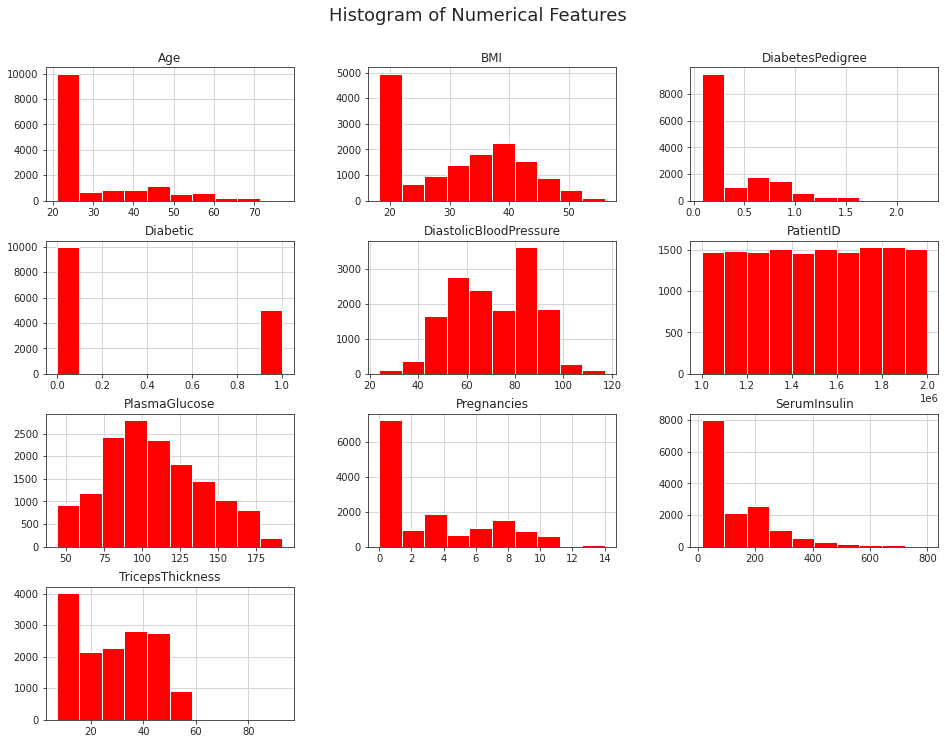

In [19]:
sns.set_style('ticks')
diabetes_df.hist(figsize=(16,12), color='red')
plt.suptitle('Histogram of Numerical Features', fontsize=18, y=0.95)
plt.show()

Most of the features are Unimodal around the first quartile. This means they tend to have a high frequency of low values. Take for eaxmple features like `TricepsThickness`, `SerumInsulin`, `Pregnancies`, `Age`, `BMI` and `DiabetesPedugree`. All these features have a high concentration of low values around the first quartile and progressively fewer high values.This shows that generally our data set has a distribution of more frequent low values .

We can also see that features like Age, DiabetesPedigree, SerumInsulin seem to be skewed to the right.
This is due to a lot of smaller values present and a progressive distribution of fewer large values.

Let's make the distribution better by using the log of the values, rather than actual values in these features.
This is a part of the feature-engineering process in Machine Learning

In [20]:
for i in diabetes_df.columns:
    if i in ['Age', 'DiabetesPedigree','SerumInsulin']:
        diabetes_df[i] = diabetes_df[i].apply(np.log)
        print(i)

SerumInsulin
DiabetesPedigree
Age


Now that we've applied the log function to a few variables, let's see the distribution again

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

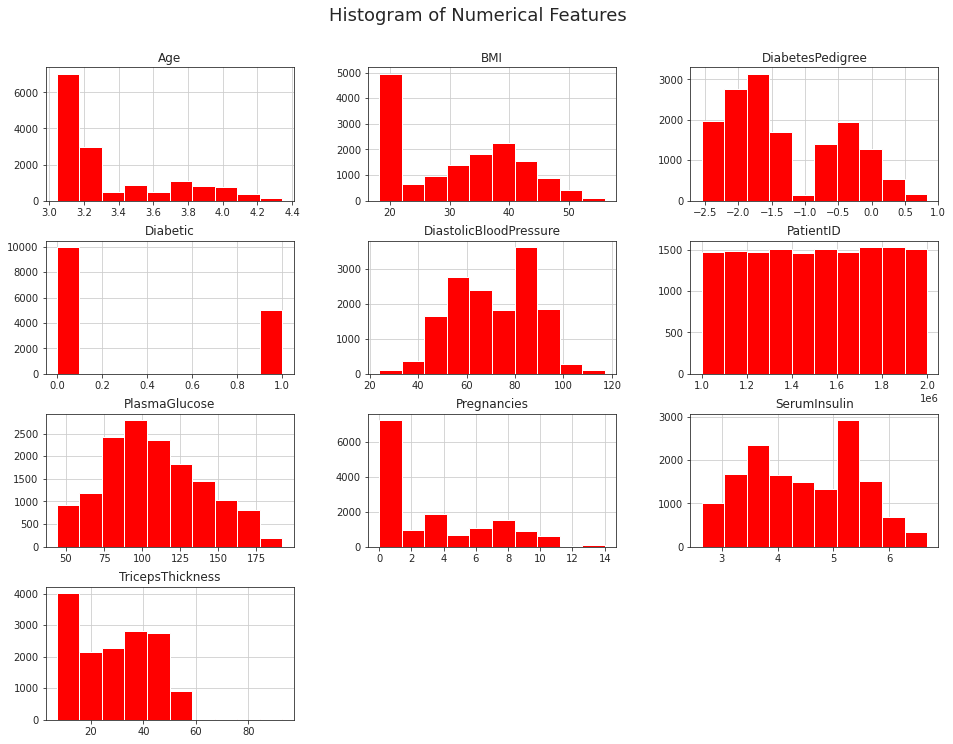

In [21]:
sns.set_style('ticks')
diabetes_df.hist(figsize=(16,12), color='red')
plt.suptitle('Histogram of Numerical Features', fontsize=18, y=0.95)
plt.show()

Ofcourse we can see an improvement in the shape of the above distributions. Even those that are asymmetrical like `Age` and `Pregnancies` do show some improvement.

<h4>Feature-Selection</h4>

Just by eye-balling the dataset, we can see that certain columns hold little or no scientific or statistical importance. A good example is the PatientID column, which is important for indexing or merging data frames, but not important for training a model. Another is the Physician Column. We do not want our model to learn attributes related to physicians, because we do not want the physician data to influence model prediction in the real world. 

In [22]:
# Let's drop the Physician and PatientID columns
diabetes_df.drop(['PatientID','Physician'], axis=1, inplace=True)

# Let's see the data frame
diabetes_df.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,3.135494,43.509726,0.193254,3.044522,0
1,8,92,93,47,3.583519,21.240576,-1.842853,3.135494,0
2,7,115,47,52,3.555348,41.511523,-2.538072,3.135494,0
3,9,103,78,25,5.717028,29.582192,0.249100,3.761200,1
4,1,85,59,27,3.555348,42.604536,-0.598670,3.091042,0


<h4>How balanced is our Data set?</h4>

It is very important to know the class distribution of variables in our data set. Ideally variables should be relatively equally distributed so that one particular class does not overshadow the other class when we train the model.
<br>An imbalanced dataset makes the model to have a high recognition rate (sensitivity) for the dominant class. The F1 score of the model could be unreliable in an imbalanced Data set

<br>For example, if we have 80% of our data in class 0 or non-diabetic and only 20% in class 1 or diabetic, the model we train with this imbalanced data set will learn the attributes of class 0, far more than class 1 and would not generalise properly in real-world or unseen data sets.

Okay let's check the distribution of class observations in our data set

In [23]:
diabetes_df.Diabetic.value_counts()

0    10000
1     5000
Name: Diabetic, dtype: int64

we can see that 10,000 observations are labelled non-diabetics, while 5,000 are diabetic. <br>This is an imbalanced data set. Let's visualize this relationship.

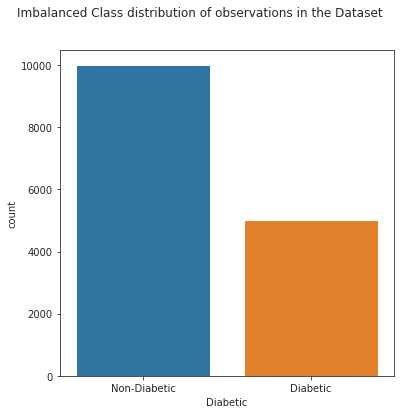

In [24]:
x = diabetes_df.Diabetic.replace(to_replace=[0,1], value=['Non-Diabetic', 'Diabetic'])
plt.figure(figsize=(6, 6))
sns.countplot(x)
plt.suptitle('Imbalanced Class distribution of observations in the Dataset', x=0.45)
plt.show()

<h4>Balance the dataset</h4>

In [25]:
from imblearn.over_sampling import SMOTE 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


We have just imported the SMOTE module from imblearn library. SMOTE stands for _Synthetic Minority Over-sampling Technique_. What it does is to create random synthetic data from the minority class we want to balance, such that we will have equal observations in both classes and the random synthetic data will have the attributes and nuances of the minority class it's created from. 

In [0]:
sm = SMOTE(sampling_strategy='minority', random_state=5, k_neighbors=5)

Now let's pass the features and our target label to the SMOTE instance created above

In [27]:
resampled_features, resampled_target = sm.fit_resample(diabetes_df.iloc[:,:-1], diabetes_df.Diabetic)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Let's see the shapes of our new data set

In [28]:
print('Shape of resampled feature set is:',resampled_features.shape)
print('Shape of resampled target data is:',resampled_target.shape)
type(resampled_features)
type(resampled_target)

Shape of resampled feature set is: (20000, 8)
Shape of resampled target data is: (20000,)


numpy.ndarray

We can see that both resampled features and target above have been converted from a pandas object to a numpy data frame. let's convert them back to a Data frame as it will be easier when normalizing feature columns.

In [29]:
resampled_features[:5]

array([[  0.        , 171.        ,  80.        ,  34.        ,
          3.13549422,  43.50972593,   0.19325437,   3.04452244],
       [  8.        ,  92.        ,  93.        ,  47.        ,
          3.58351894,  21.24057571,  -1.8428529 ,   3.13549422],
       [  7.        , 115.        ,  47.        ,  52.        ,
          3.55534806,  41.51152348,  -2.53807242,   3.13549422],
       [  9.        , 103.        ,  78.        ,  25.        ,
          5.7170277 ,  29.58219193,   0.24909964,   3.76120012],
       [  1.        ,  85.        ,  59.        ,  27.        ,
          3.55534806,  42.60453585,  -0.59867031,   3.09104245]])

<h4>Defining our Features and Target Matrices.</h4>

In [30]:
# First let's make our features matrix a data frame from resampled features.
features = pd.DataFrame(resampled_features, columns=diabetes_df.columns[:-1])

# Let's make our target the resampled target above
target = resampled_target 

# Let's see our features and target shape
print('Shape of feature set is:',features.shape)
print('Shape of target data is:',target.shape)

features.head()

Shape of feature set is: (20000, 8)
Shape of target data is: (20000,)


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.0,171.0,80.0,34.0,3.135494,43.509726,0.193254,3.044522
1,8.0,92.0,93.0,47.0,3.583519,21.240576,-1.842853,3.135494
2,7.0,115.0,47.0,52.0,3.555348,41.511523,-2.538072,3.135494
3,9.0,103.0,78.0,25.0,5.717028,29.582192,0.249100,3.761200
4,1.0,85.0,59.0,27.0,3.555348,42.604536,-0.598670,3.091042


Finally let's visualize the new class distribution of observations in our data set

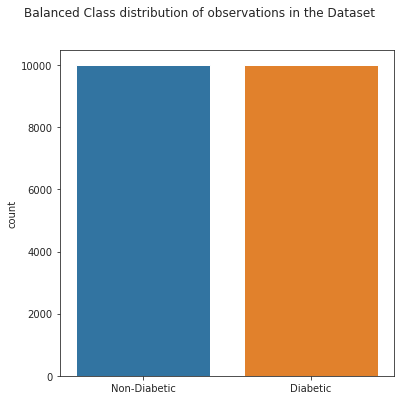

In [31]:
x = pd.Series(target).replace(to_replace=[0,1], value=['Non-Diabetic', 'Diabetic'])
plt.figure(figsize=(6,6))
sns.countplot(x)
plt.suptitle('Balanced Class distribution of observations in the Dataset', x=0.45)
plt.show()

**Multi-collinearity Check:**

Let's inspect the correlation matrix of our features, let's see if we have a multi-collinearity problem amongst our features.
<br>Multi-collinearity occurs when two or more features in our data set have a strong negative (score close to minus one) or positive (score close to one) relationship. Multicolinearity saps the statistical power of the analysis and can cause the coefficients of our model to switch signs, distorting the correct model. It can lead to bias and a wrong F1 score.

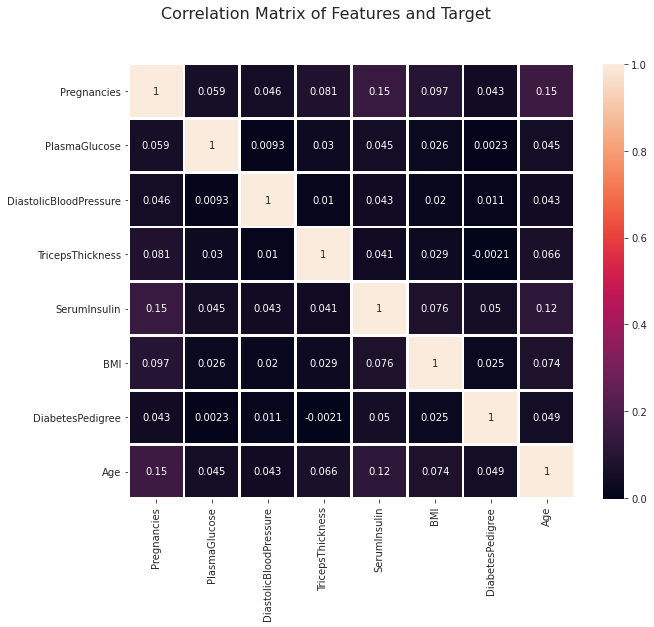

In [32]:
plt.figure(figsize=(10,8))
corr_matrix = features.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=2)
plt.suptitle('Correlation Matrix of Features and Target', fontsize=16, x=0.4)
plt.show()

From the image above,
<br>Lighter colors indicate higher correlation, and darker color indicate weak or no correlation.<br>We can clearly see that all features are unique and independent with corr scores around 0, and thus, we do not have a multi-collinearity problem.

<h4>Normalising the Data</h4>

In Machine learning and Artificial Intelligence in general, it's important to normalise feature values. Normalising puts all the values of the features we use to train our models on the same scale. Between a specific range of values.<br>This is essential so that features with higher values like `PlasmaGlucose,	DiastolicBloodPressure	`, do not dominate other features with lower values and thus skew the model predictions.

Looking at the shapes of the distribution of each feature, those with a roughly normal distribution bell-shape curve, will be normalized using the Zscore method.
While those with varying large and low values will be normalized using the Min-Max method.

1. **Z-Score or Standard Score Normalization:**<br>
Using Z-Score, For each feature value, we subtract the average or mean...
And then divide by the Standard deviation.
This gives a range between minus 3 and 3, but can be more or less

$Xnew =$ $Xold - mean \over STD(sigma)$
<br>
<br>

2. **Min-Max Method Normalization:**<br>
This method takes each value and subtracts the min and then divides by the range(max - min)...
The resultant values range between zero(0) and one(1)

$Xnew =$ $Xold - Xmin \over Xmax - Xmin$

Now let's apply these methods to the selected columns using the apply method.

So let's go on and normalise the data set using both Z-score and Min-max normalizers.<br>The rule is If columns are Not `Age`, `Pregnancies` and `TricepsThickness` we apply Z-score, then Min-max otherwise.


In [0]:
# Let's loop through each feature
for col in features.columns:
    # Next let's define statistical moments for each feature
    mean = features[col].mean()
    stdev = features[col].std()
    minimum = features[col].min()
    maximum = features[col].max()

    if col in ['Age', 'Pregnancies','TricepsThickness']:
        # if True, We apply the Min-Max method using apply and lambda
        features[col] = features[col].apply(lambda x: (x - minimum) / (maximum - minimum))
    else:
        # If Not True, we apply Z-score method to the rest
        features[col] = features[col].apply(lambda x: (x - mean) / stdev)


Let's see the normalized features data frame

In [34]:
features.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.000000,1.943191,0.510537,0.313953,-1.544660,1.200633,1.734444,0.000000
1,0.571429,-0.545930,1.317695,0.465116,-1.065025,-1.167831,-0.699438,0.070017
2,0.500000,0.178751,-1.538403,0.523256,-1.095183,0.988112,-1.530475,0.070017
3,0.642857,-0.199343,0.386359,0.209302,1.219015,-0.280648,1.801199,0.551595
4,0.071429,-0.766485,-0.793334,0.232558,-1.095183,1.104360,0.787809,0.035804


Finally let's convert the features to a numpy array just like the target. Using Numpy arrays work best in machine learning

In [35]:
# We shall use the .values method to convert to numpy arrays
features = features.values

# Let's see the first five entries
print(f"Type features: {type(features)}")
print()
features[:5]

Type features: <class 'numpy.ndarray'>



array([[ 0.        ,  1.94319073,  0.51053721,  0.31395349, -1.54466028,
         1.20063294,  1.73444374,  0.        ],
       [ 0.57142857, -0.54592991,  1.31769544,  0.46511628, -1.06502486,
        -1.16783085, -0.69943777,  0.07001691],
       [ 0.5       ,  0.17875078, -1.5384029 ,  0.52325581, -1.09518336,
         0.98811158, -1.53047548,  0.07001691],
       [ 0.64285714, -0.19934349,  0.38635902,  0.20930233,  1.21901506,
        -0.28064765,  1.80119894,  0.55159475],
       [ 0.07142857, -0.7664849 , -0.79333377,  0.23255814, -1.09518336,
         1.1043603 ,  0.78780853,  0.03580438]])

### **Creating The Classifier Model:**

Using the `Don't Repeat Yourself (DRY)` Paradigm, we shall attempt to create a machine learning Pipeline using `CASH` tools like `LALE` (Language for Automated Learning Explorartion) or `AutoSklearn`. 
<br>CASH stands for _Combined Algorithm Selection and Hyper-paramters Optimisation technique_

**Splitting The Data:**

First let's split the data in 70% training, 15% validating and 15% Testing sets.

In [0]:
from sklearn.model_selection import train_test_split

We shall use the train_test_split function to divide our data into training, testing and validating sets

In [0]:
x_train, x_val, y_train, y_val = train_test_split(features, target, train_size =0.7, shuffle=True, stratify=target) 

Let's see the shape of the training and validating sets

In [38]:
print(f"Shape of training set is {x_train.shape}, \nShape of validating set is {x_val.shape}")
print(f"Shape of training target is {y_train.shape}, \nShape of validating target is {y_val.shape}")

Shape of training set is (14000, 8), 
Shape of validating set is (6000, 8)
Shape of training target is (14000,), 
Shape of validating target is (6000,)


Now let's further split the validating set into validating and testing sets

In [0]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size =0.5, shuffle=True, stratify=y_val) 

Let's see the final shapes of the training, validating and testing sets

In [40]:
print(f"Shape of training set is {x_train.shape}, \nShape of training target is {y_train.shape}")
print(f"Shape of validating set is {x_val.shape}, \nShape of validating target is {y_val.shape}")
print(f"Shape of testing set is {x_test.shape}, \nShape of testing target is {y_test.shape}")

Shape of training set is (14000, 8), 
Shape of training target is (14000,)
Shape of validating set is (3000, 8), 
Shape of validating target is (3000,)
Shape of testing set is (3000, 8), 
Shape of testing target is (3000,)


Let's import our models and build a LALE pipeline to compute the best model using HyperOpt Library

In [0]:
from sklearn.decomposition import PCA
from lale.lib.lale import NoOp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGBoost
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neighbors import KNeighborsClassifier as KNN
from lale.lib.lale import TopKVotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from lale.lib.lale import Hyperopt
lale.wrap_imported_operators()

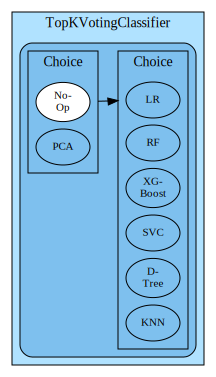

In [42]:
planned_pipeline = (NoOp | PCA) >> (LR | RF | XGBoost | SVC | DTree | KNN)
ensemble = TopKVotingClassifier(estimator=planned_pipeline)
# ensemble = TopKVotingClassifier(
#     estimator=planned_pipeline, k=3, optimizer=Hyperopt,
#     args_to_optimizer={'max_evals':25, 'scoring':'roc_auc'})
ensemble.visualize()

The above image depicts the smartness of the LALE pipeline object.<br>For each of the six models above, the pipeline decides if it should apply Principal Components Analysis or No Operation, then it optimizes each model and returns the pipeline with the best model. We would then select this ideal model for our classification task.
<br>This process is called semi-automated machile learning. 

In [0]:
try:
    trained_ensemble = ensemble.fit(x_train, y_train)
    print('Trained Successful!')
except Exception as e:
    print(e)

Sadly, LALE keeps failing with error message 'AllTrialsFailed' and this issue has been escalated to the project administrators.
<br>The sweet thing about Machine Learning (ML) is that most ML processes are iterative just like the Explainability concept. Therefore we shall build a simple but effective pipeline using Cross-Validation-Score. Then the best model will be selected and optimized even further using GridSearchCV library.


In [0]:
# Let's import cross-val-score and GridSearchCV from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Next, we evaluate all six models using Cross_Val_score to find the model with the best average score. 
<br>What cross_val_score does is that it divides the training set into a number of parts. It trains the model on all parts except one, then it uses that part to make a prediction and stores the result somewhere. Then it repeats this process for each of the other parts to ensure every part has been used to train and make predictions. Finally it outputs the mean score for all predictions as score for each model.
<br>So we would use this approach to select the model with the best average score per prediction 

Let's import our models again, since the last time we wrapped them in a LALE wrapper that failed.

In [0]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGBoost
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

Now we apply cross_val_score() function to each model to find the average best model.

In [46]:
for Model in [LR, RF, XGBoost, SVC, DTree, KNN]:
    scores = cross_val_score(Model(), x_train, y_train, cv=7)
    print(Model.__name__, scores.mean().round(2), "+/-", scores.std().round(2))

LogisticRegression 0.79 +/- 0.01
RandomForestClassifier 0.95 +/- 0.0
XGBClassifier 0.95 +/- 0.0
SVC 0.87 +/- 0.01
DecisionTreeClassifier 0.91 +/- 0.0
KNeighborsClassifier 0.87 +/- 0.0


So what we just did above is to apply the cross_val_score() function on each of our six models. on our training sets(x_train, y_train)
<br>From this exercise we can see that the two best models with mean score of 0.95 are `XGBoost` and `RandomForestClassifier`.
<br>Now we shall apply GridSearchCV on these models to fine-tune their hyper-parameters and select the best of the two models.  

In [47]:
depth = [2, 4, 8, 16, 32]
estimators = [10,30, 50, 80, 100]
selected_models = [RF, XGBoost]

# Let's instantiate our RF and XGB models to zero for a start.
rf_model, xgb_model = 0,0

for Model in selected_models:
    grid = GridSearchCV(Model(), cv=7,
                    param_grid = {'max_depth': depth,
                                  'n_estimators': estimators})
    if Model == RF:
        rf_model = grid.fit(x_train, y_train)
        print(Model.__name__, ': Best score = ',rf_model.best_score_)
        print(f"Type rf_model is {type(rf_model)}")
    else:
        xgb_model = grid.fit(x_train, y_train)
        print(Model.__name__, ': Best score = ',xgb_model.best_score_)
        print(f"Type xgb_model is {type(xgb_model)}")

RandomForestClassifier : Best score =  0.948857142857143
Type rf_model is <class 'sklearn.model_selection._search.GridSearchCV'>
XGBClassifier : Best score =  0.9632857142857142
Type xgb_model is <class 'sklearn.model_selection._search.GridSearchCV'>


We can see from the above messages that after applying GridSearchCV to both models, the `XGBoost` model has the best score overall.
<br>So we shall use this model to predict on the validation set. and test for accuracy, F1_score and roc_auc scores.

In [48]:
# let's just see the best parameters of our winning model.
xgb_model.best_params_

{'max_depth': 8, 'n_estimators': 100}

Now, Let's make a prediction on the validation data.

In [0]:
pred = xgb_model.predict(x_val)

Let's define an evaluation method that takes a true label and a prediction and outputs a dictionary of the metrics we care most about.

In [0]:
def eval_method(ytrue, ypred):
    """This method takes a true label and 
    a prediction of the true label and returns
    a dictionary of accuracy, F1 and roc_auc
    scores of our model predictions.
    """
    # Let's create a dictionary
    eval_dict = {'Accuracy':0, 'F1_Score':0, 'Roc_Auc':0}

    # Let's evaluate 
    eval_dict['Accuracy'] = accuracy_score(ytrue, ypred).round(2)
    eval_dict['F1_Score'] = f1_score(ytrue, ypred, average='weighted').round(2)
    eval_dict['Roc_Auc'] = roc_auc_score(ytrue, ypred).round(2)

    return eval_dict


Let's see the performance metrics of our model on the validation set.

In [51]:
eval_method(y_val, pred)

{'Accuracy': 0.96, 'F1_Score': 0.96, 'Roc_Auc': 0.96}

<b><h3>Understanding the Model Prediction</h3></b>

Our model has performed impressively on all the metrics above for the validation dataset. This is great.<br>For a better understanding of the predictions and metrics of our model, let's plot the confusion matrix chart.

<h4>Let's define a function for plotting and visualizing The Confusion matrix</h4>First let's import the confusion matrix metric from sklearn. 

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

Next let's define a method that plots the confusion matrix object we will instantiate soon.

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Next, let's instantiate the confusion matrix object and plot it with the data from the predictions \ evaluations from our model

Confusion matrix, without normalization
[[1442   58]
 [  62 1438]]


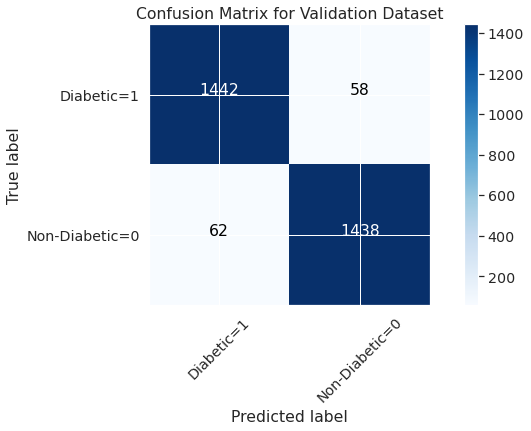

In [54]:
# Instantiating the confusion matrix object
xgb_confusion_matrix = confusion_matrix(y_val, pred, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.3)
plot_confusion_matrix(xgb_confusion_matrix, 
                        classes=['Diabetic=1','Non-Diabetic=0'],
                        normalize= False,  
                        title='Confusion Matrix for Validation Dataset')

In [55]:
eval_method(y_val, pred)

{'Accuracy': 0.96, 'F1_Score': 0.96, 'Roc_Auc': 0.96}

### **Understanding The Confusion Matrix:**

The Confusion Matrix is typically used for binary classification problems but can be used for multi-label classification problems by simply binarizing the output. It gives a more thorugh suite of metrics to evaluate a Classification model. This is because accuracy alone is often inadequate in evaluating a classification task. The Confusion Matrix makes it possible to compute those metrics we care about,  such as _Accuracy_, _F1_score_, _Recall_, _Precision_, _ROC_, _AUC_ and more.

**Let’s inspect the cells of The Confusion-Matrix above:**
1. _True Positive (TP):_ This is the cell in position [0,0], it's the first blue cell in the Matrix above.<br>True Positive contains the number of positive cases **properly** classified as positive. In other words, the number of Diabetic patients properly classified as Diabetic.
<br>
<br>
2. _False Positive (FP):_ This is the cell in position [0,1], it's the white cell to the right, beside _TP_,in the Matrix above.<br>False Positive contains the number of negative cases **improperly** classified as positive. In other words, the number of Non-Diabetic patients improperly classified as Diabetic.
<br>
<br>
3. _True Negative (TN):_ This is the cell in position [1,1], it's the second blue cell situated directly beneath _FP_ above.<br>True Negative contains the number of negative cases **properly** classified as negative. In other words, the number of Non-Diabetic patients properly classified as Non-Diabetic.
<br>
<br>
4. _False Negative (FN):_ This is the cell in position [1,0], it's the white cell to the left, beside _TN_,in the Matrix above.<br>False Negative contains the number of positive cases **improperly** classified as negative. In other words, the number of Diabetic patients improperly classified as Non-Diabetic.

From the Confusion Matrix, we can easily compute any of the classification metrics we care about.
<br>Let's calculate the accuracy, F1_score and Roc_Auc scores using the confusion matric above 

In [56]:
# First we define our variables
TP = xgb_confusion_matrix[0][0]
FP = xgb_confusion_matrix[0][1]
TN = xgb_confusion_matrix[1][1]
FN = xgb_confusion_matrix[1][0]

print(f"TP is {TP}\nFP is {FP}\nTN is {TN}\nFN is {FN}")

TP is 1442
FP is 58
TN is 1438
FN is 62


<b><h4>Accuracy:</h4></b>
Accuracy is simply the fraction of cases correctly classified.<br>Accuracy:-  ${{(TP + TN)} \over {TP + TN + FP + FN}} * 100$

In [57]:
accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100

# Let's print the accuracy score, which is what we saw from accuracy_score() func above
print(accuracy.round())

96.0


<b><h4>F1_Score:</h4></b>
F1_Score is the weighted harmonic mean of Precision and Recall.<br>F1_Score:-  $2 * {{Precision * Recall} \over {Precision + Recall}}$

To Compute the F1_score, we need to first compute _Precision_ and _Recall_ scores.

**Precision:** Is the fraction of positive cases correctly classified as positive, from the total number of cases identified as positive by the model.

**Recall:** Is the fraction of positive cases correctly classified as positive, from the total number of real positive cases in the data.

In [58]:
# First, let's compute Precision and Recall
Precision = (TP) / (TP + FP)
Recall = (TP) / (TP + FN)

print(f'Precision is {Precision.round(4)},\nRecall is {Recall.round(4)}')

Precision is 0.9613,
Recall is 0.9588


In [59]:
# Next, let's compute F1_Score
F1_Score = 2 * ((Precision * Recall) / (Precision + Recall))
print(f"F1_Score is {F1_Score.round(2)}")

F1_Score is 0.96


The F1_Score is a far better metric than mere Accuracy, as it tells us how sensitive our model is to the Diabetic class, as well as it's general performance in classifying cases that are Diabetic.<br>This metric is very important if we want to build a classifier that can be used to effectively classify Diabetic or Non-Diabetic patients. And from this exercise so far, our model is 96% correct on F1_Score.

<b><h4>AUC_Score:</h4></b>

AUC_Score simply shows the Trade-off between the _True Positive Rate (TPR)_ and the _False Positive rate (FPR)_. The AUC_Score is calculated from the _ROC (Receiver Operator Characteristics) curve_. The _ROC curve_ simply plots all values of the TPR and the FPR and displays a curve. The closer it is to the position 1,1 on the x and y axis, the better the model and the higher the AUC score, with a max score of 1 or 100%. 

**_TPR_** shows what fraction of positive cases was correctly classified as positive from total number of positive real cases in the data.<br>**_FPR_** shows what fraction of negative cases was incorrectly classified as positive from the total number of real negative cases in the data set.

In [60]:
TPR = Recall  # The TPR is calculated exactly like the Recall
FPR = FP / (TN + FP) 
print(f"TPR is {TPR}\nFPR is {FPR}")

TPR is 0.9587765957446809
FPR is 0.03877005347593583


Let's define a simple function that plots the ROC_curve and displays the AUC_score.

In [0]:
def plot_roc_curve(model, x_test, y_test, pred):
     # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    plt.figure(figsize=(8,6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return None

Let's call the plot_roc_curve method defined above on the XGBoost classifier with the prediections on the validation data

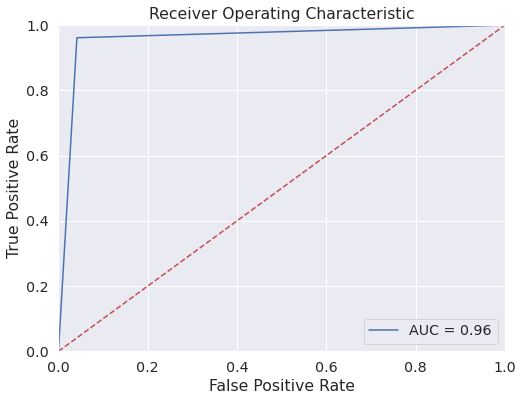

In [65]:
plot_roc_curve(xgb_model, x_val, y_val, pred)

Just like F1_score, AUC_Score is extremely important in evaluating the performance of our model. It clearly shows what percent of positve cases the model identified correctly as well as the percent of negative cases it may have misclassified as positive.

### **Making Predictions on Testing Data**